#### 0. Import basic methods (a.o. from source2.py)

In [8]:
from source2 import *
import numpy as np

In [10]:
# load basic info from the Input sheet
mapping = load_input_from_xls(filename=r'Case 1 - Input Sheet.xlsm')
Inputs = extract_scenario(mapping, 'Scenario1')

##### 1. prepare input data and generate objects
We are testing the following cases:
##### 1.1 Turbines

In [11]:
turbine_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Turbine')
turbine_data['depreciation_rate']=1/turbine_data['economic_lifetime']
display(turbine_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Turbine',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 1139979,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.08,
 'residual_value': 0.01}

In [12]:
Turbine = Object(**turbine_data)
# hier heb je alleen het object met inputs

In [13]:
Turbine.generate_cashflows(startyear=2023, lifecycle=29, debug=False)
# na deze regel heeft Turbine.df (dataframe met alleen Capex, Opex en Residuals)

In [14]:
display(Turbine.decommissioning_year)
display(Turbine.decommissioning_value)

2052

-517703650.4249944

##### 1.2 Foundations and cables

In [15]:
foundation_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation_data['depreciation_rate']=1/foundation_data['economic_lifetime']
display(foundation_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 971621,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.35,
 'residual_value': 0.01}

In [16]:
Foundation = Object(**foundation_data)
# hier heb je alleen het object met inputs

In [17]:
Foundation.generate_cashflows(startyear=2023, lifecycle=29, debug=False)
# na deze regel heeft Turbine.df (dataframe met alleen Capex, Opex en Residuals)

In [18]:
(Turbine.df+Foundation.df).tail()

,years,capex,opex,revenue
years,,,,
2048,4096,0.000000e+00,-3.111576e+08,0
2049,4098,0.000000e+00,-3.173807e+08,0
2050,4100,0.000000e+00,-3.237283e+08,0
2051,4102,0.000000e+00,-3.302029e+08,0
2052,4104,6.617606e+08,-2.784964e+09,0


##### 1.3 AC Substation

In [19]:
AC_substation_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='AC Substation')
AC_substation_data['depreciation_rate']=1/AC_substation_data['economic_lifetime']
display(AC_substation_data)

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'AC Substation',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 239301,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

In [20]:
ACStation = Object(**AC_substation_data)

In [21]:
ACStation.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.4 DC Collection Cable

In [22]:
DC_collection_cable_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='DC collection cable')
DC_collection_cable_data['depreciation_rate']=1/DC_collection_cable_data['economic_lifetime']
display(DC_collection_cable_data)

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'DC collection cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 470134,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

In [23]:
DCCollectionCable = Object(**DC_collection_cable_data)

In [24]:
DCCollectionCable.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.5 DCAC Converter

In [25]:
DCAC_converter_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electricity',
                               component='DCAC Converter')
DCAC_converter_data['depreciation_rate']=1/DCAC_converter_data['economic_lifetime']
display(DCAC_converter_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electricity',
 'component': 'DCAC Converter',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 37077,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 25,
 'depreciation_flag': 1,
 'depreciation_rate': 0.04,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.25,
 'residual_value': 0.01}

In [26]:
DCACConverter = Object(**DCAC_converter_data)

In [27]:
DCACConverter.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.6 Mainland

In [28]:
Mainland_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Facility location',
                               component='Mainland')
Mainland_data['depreciation_rate']=1/Mainland_data['economic_lifetime']
display(Mainland_data)

issue detected


{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Facility location',
 'component': 'Mainland',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 6000,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 80,
 'depreciation_flag': 1,
 'depreciation_rate': 0.0125,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.1,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.01,
 'residual_value': []}

In [29]:
Mainland = Object(**Mainland_data)

In [30]:
Mainland.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

#####  2. Test values - Foundation & Cables
##### 2.1 - CAPEX values

In [31]:
MTBS_values = {'years': [2023, 2024, 2025], 
               'values': [-594_632_052, -1_213_049_386, -1_237_310_374]}

In [32]:
for index, year in enumerate(MTBS_values['years']):
    
    print('CAPEX value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Foundation.df[Foundation.df.index==year].capex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Foundation.df[Turbine.df.index==year].capex.item(), 0)

CAPEX value testing in 2023: MTBS: -594632052 TUD/VO: -594632052.0
CAPEX value testing in 2024: MTBS: -1213049386 TUD/VO: -1213049386.08
CAPEX value testing in 2025: MTBS: -1237310374 TUD/VO: -1237310373.8016


##### 2.2 - OPEX values

In [33]:
MTBS_values = {'years': [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052],
               'values': [-65_919_941, -67_238_340, -68_583_107, -69_954_769, -71_353_864, -72_780_942, -74_236_561, -75_721_292, -77_235_718, -78_780_432, -80_356_041, -81_963_161, -83_602_425, -85_274_473, -86_979_963, -88_719_562, -90_493_953, -92_303_832, -94_149_909, -96_032_907, -97_953_565, -99_912_636, -101_910_889, -103_949_107, -106_028_089, -108_148_651, -2_040_765_041,]}

In [34]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Opex value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Foundation.df[Foundation.df.index==year].opex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Foundation.df[Turbine.df.index==year].opex.item(), 0)

Opex value testing in 2026: MTBS: -65919941 TUD/VO: -65919941.28234628
Opex value testing in 2027: MTBS: -67238340 TUD/VO: -67238340.1079932
Opex value testing in 2028: MTBS: -68583107 TUD/VO: -68583106.91015308
Opex value testing in 2029: MTBS: -69954769 TUD/VO: -69954769.04835613
Opex value testing in 2030: MTBS: -71353864 TUD/VO: -71353864.42932326
Opex value testing in 2031: MTBS: -72780942 TUD/VO: -72780941.71790972
Opex value testing in 2032: MTBS: -74236561 TUD/VO: -74236560.55226792
Opex value testing in 2033: MTBS: -75721292 TUD/VO: -75721291.76331328
Opex value testing in 2034: MTBS: -77235718 TUD/VO: -77235717.59857954
Opex value testing in 2035: MTBS: -78780432 TUD/VO: -78780431.95055114
Opex value testing in 2036: MTBS: -80356041 TUD/VO: -80356040.58956216
Opex value testing in 2037: MTBS: -81963161 TUD/VO: -81963161.4013534
Opex value testing in 2038: MTBS: -83602425 TUD/VO: -83602424.62938048
Opex value testing in 2039: MTBS: -85274473 TUD/VO: -85274473.12196809
Opex val

##### 2.3 - Decommissioning


In [35]:
MTBS_values = {'years': [2052],
               'values': [-1930453417]} # decommissioning from MTBS, residual from python

In [36]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Decommissioning value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Foundation.decommissioning_value))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Foundation.decommissioning_value, 0)

Decommissioning value testing in 2052: MTBS: -1930453417 TUD/VO: -1930453417.1830597


#####  3. Test values - Turbines
##### 3.1 - CAPEX values

In [37]:
MTBS_values = {'years': [2023, 2024, 2025], 
               'values': [-697_667_148, -1_423_240_982, -1_451_705_802]}

In [38]:
for index, year in enumerate(MTBS_values['years']):
    
    print('CAPEX value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Turbine.df[Turbine.df.index==year].capex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Turbine.df[Turbine.df.index==year].capex.item(), 0)

CAPEX value testing in 2023: MTBS: -697667148 TUD/VO: -697667148.0
CAPEX value testing in 2024: MTBS: -1423240982 TUD/VO: -1423240981.92
CAPEX value testing in 2025: MTBS: -1451705802 TUD/VO: -1451705801.5584


##### 3.2 - OPEX values

In [39]:
MTBS_values = {'years': [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052],
               'values': [-135_348_928, -138_055_906, -140_817_024, -143_633_365, -146_506_032, -149_436_153, -152_424_876, -155_473_373, -158_582_841, -161_754_497, -164_989_587, -168_289_379, -171_655_167, -175_088_270, -178_590_035, -182_161_836, -185_805_073, -189_521_174, -193_311_598, -197_177_830, -201_121_386, -205_143_814, -209_246_690, -213_431_624, -217_700_257, -222_054_262, -744_198_997,]}

In [40]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Opex value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Turbine.df[Turbine.df.index==year].opex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Turbine.df[Turbine.df.index==year].opex.item(), 0)

Opex value testing in 2026: MTBS: -135348928 TUD/VO: -135348927.51436898
Opex value testing in 2027: MTBS: -138055906 TUD/VO: -138055906.06465635
Opex value testing in 2028: MTBS: -140817024 TUD/VO: -140817024.18594947
Opex value testing in 2029: MTBS: -143633365 TUD/VO: -143633364.66966847
Opex value testing in 2030: MTBS: -146506032 TUD/VO: -146506031.96306187
Opex value testing in 2031: MTBS: -149436153 TUD/VO: -149436152.60232309
Opex value testing in 2032: MTBS: -152424876 TUD/VO: -152424875.65436956
Opex value testing in 2033: MTBS: -155473373 TUD/VO: -155473373.16745695
Opex value testing in 2034: MTBS: -158582841 TUD/VO: -158582840.6308061
Opex value testing in 2035: MTBS: -161754497 TUD/VO: -161754497.4434222
Opex value testing in 2036: MTBS: -164989587 TUD/VO: -164989587.39229065
Opex value testing in 2037: MTBS: -168289379 TUD/VO: -168289379.14013648
Opex value testing in 2038: MTBS: -171655167 TUD/VO: -171655166.72293922
Opex value testing in 2039: MTBS: -175088270 TUD/VO: 

##### 3.3 - Decommissioning

In [41]:
MTBS_values = {'years': [2052],
               'values': [-517703650]} # decommissioning from MTBS, residual from python

In [42]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Decommissioning value testing in {}: MTBS: {} TUD/VO: {}'.format(year,-MTBS_values['values'][index], Turbine.decommissioning_value))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Turbine.decommissioning_value, 0)

Decommissioning value testing in 2052: MTBS: 517703650 TUD/VO: -517703650.4249944


##### 3.4 - Divestment SUM (Foundation & Cables + Turbines)

In [43]:
MTBS_values = {'years': [2052],
               'values': [ 661760574]} # decommissioning from MTBS

wind_energy = [Foundation.divestment_value, Turbine.divestment_value]

for index, year in enumerate(MTBS_values['years']):
    
    print('Divestment value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], sum(wind_energy)))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  sum(wind_energy), 0)

Divestment value testing in 2052: MTBS: 661760574 TUD/VO: 661760574.336


In [44]:
display(Foundation.df[Foundation.df.index==2052].capex.item())
display(Turbine.df[Turbine.df.index==2052].capex.item())

304499181.18815994

357261393.14784

#####  4. Test values - AC Substation
##### 4.1 - CAPEX values

In [45]:
MTBS_values = {'years': [2023, 2024, 2025], 
               'values': [-146_452_212, -298_762_512, -304_737_763,]}

In [46]:
for index, year in enumerate(MTBS_values['years']):
    
    print('CAPEX value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], ACStation.df[ACStation.df.index==year].capex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  ACStation.df[ACStation.df.index==year].capex.item(), 0)

CAPEX value testing in 2023: MTBS: -146452212 TUD/VO: -146452212.0
CAPEX value testing in 2024: MTBS: -298762512 TUD/VO: -298762512.48
CAPEX value testing in 2025: MTBS: -304737763 TUD/VO: -304737762.72959995


##### 4.2 - OPEX values

In [47]:
MTBS_values = {'years': [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052],
               'values': [-28_412_044, -28_980_285, -29_559_891, -30_151_089, -30_754_110, -31_369_193, -31_996_576, -32_636_508, -33_289_238, -33_955_023, -34_634_123, -35_326_806, -36_033_342, -36_754_009, -37_489_089, -38_238_871, -39_003_648, -39_783_721, -40_579_395, -41_390_983, -42_218_803, -43_063_179, -43_924_443, -44_802_932, -45_698_990, -46_612_970, -319_232_254,]}

In [48]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Opex value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], ACStation.df[Foundation.df.index==year].opex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  ACStation.df[ACStation.df.index==year].opex.item(), 0)

Opex value testing in 2026: MTBS: -28412044 TUD/VO: -28412044.171968084
Opex value testing in 2027: MTBS: -28980285 TUD/VO: -28980285.055407446
Opex value testing in 2028: MTBS: -29559891 TUD/VO: -29559890.756515596
Opex value testing in 2029: MTBS: -30151089 TUD/VO: -30151088.571645908
Opex value testing in 2030: MTBS: -30754110 TUD/VO: -30754110.34307883
Opex value testing in 2031: MTBS: -31369193 TUD/VO: -31369192.549940407
Opex value testing in 2032: MTBS: -31996576 TUD/VO: -31996576.400939215
Opex value testing in 2033: MTBS: -32636508 TUD/VO: -32636507.928958
Opex value testing in 2034: MTBS: -33289238 TUD/VO: -33289238.08753716
Opex value testing in 2035: MTBS: -33955023 TUD/VO: -33955022.8492879
Opex value testing in 2036: MTBS: -34634123 TUD/VO: -34634123.30627366
Opex value testing in 2037: MTBS: -35326806 TUD/VO: -35326805.772399135
Opex value testing in 2038: MTBS: -36033342 TUD/VO: -36033341.88784712
Opex value testing in 2039: MTBS: -36754009 TUD/VO: -36754008.725604065
O

##### 4.3 - Decommissioning


In [49]:
MTBS_values = {'years': [2052],
               'values': [-271687025]} # decommissioning from MTBS

In [50]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Decommissioning value testing in {}: MTBS: {} TUD/VO: {}'.format(year,-MTBS_values['values'][index], ACStation.decommissioning_value))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  ACStation.decommissioning_value, 0)

Decommissioning value testing in 2052: MTBS: 271687025 TUD/VO: -271687025.0468464


#####  5. Test values - DC Collection Cable
##### 5.1 - CAPEX values

In [51]:
MTBS_values = {'years': [2023, 2024, 2025], 
               'values': [-287_722_008, -586_952_896, -598_691_954,]}

In [52]:
for index, year in enumerate(MTBS_values['years']):
    
    print('CAPEX value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], DCCollectionCable.df[DCCollectionCable.df.index==year].capex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  DCCollectionCable.df[DCCollectionCable.df.index==year].capex.item(), 0)

CAPEX value testing in 2023: MTBS: -287722008 TUD/VO: -287722008.0
CAPEX value testing in 2024: MTBS: -586952896 TUD/VO: -586952896.32
CAPEX value testing in 2025: MTBS: -598691954 TUD/VO: -598691954.2464


##### 5.2 - OPEX values

In [53]:
MTBS_values = {'years': [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052],
               'values': [-55_818_688, -56_935_062, -58_073_764, -59_235_239, -60_419_944, -61_628_342, -62_860_909, -64_118_127, -65_400_490, -66_708_500, -68_042_670, -69_403_523, -70_791_594, -72_207_426, -73_651_574, -75_124_606, -76_627_098, -78_159_640, -79_722_832, -81_317_289, -82_943_635, -84_602_508, -86_294_558, -88_020_449, -89_780_858, -91_576_475, -627_168_030,]}

In [54]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Opex value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], DCCollectionCable.df[DCCollectionCable.df.index==year].opex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  DCCollectionCable.df[DCCollectionCable.df.index==year].opex.item(), 0)

Opex value testing in 2026: MTBS: -55818688 TUD/VO: -55818688.4916655
Opex value testing in 2027: MTBS: -56935062 TUD/VO: -56935062.26149881
Opex value testing in 2028: MTBS: -58073764 TUD/VO: -58073763.50672879
Opex value testing in 2029: MTBS: -59235239 TUD/VO: -59235238.77686337
Opex value testing in 2030: MTBS: -60419944 TUD/VO: -60419943.55240063
Opex value testing in 2031: MTBS: -61628342 TUD/VO: -61628342.42344865
Opex value testing in 2032: MTBS: -62860909 TUD/VO: -62860909.271917626
Opex value testing in 2033: MTBS: -64118127 TUD/VO: -64118127.457355976
Opex value testing in 2034: MTBS: -65400490 TUD/VO: -65400490.0065031
Opex value testing in 2035: MTBS: -66708500 TUD/VO: -66708499.80663315
Opex value testing in 2036: MTBS: -68042670 TUD/VO: -68042669.80276582
Opex value testing in 2037: MTBS: -69403523 TUD/VO: -69403523.19882114
Opex value testing in 2038: MTBS: -70791594 TUD/VO: -70791593.66279757
Opex value testing in 2039: MTBS: -72207426 TUD/VO: -72207425.53605352
Opex v

##### 5.3 - Decommissioning


In [55]:
MTBS_values = {'years': [2052],
               'values': [-533760025]} # decommissioning from MTBS

In [56]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Decommissioning value testing in {}: MTBS: {} TUD/VO: {}'.format(year,-MTBS_values['values'][index], DCCollectionCable.decommissioning_value))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  DCCollectionCable.decommissioning_value, 0)

Decommissioning value testing in 2052: MTBS: 533760025 TUD/VO: -533760025.3796436


##### 5.4 - Divestment SUM (AC Station + DC Collection Cable)

In [57]:
MTBS_values = {'years': [2052],
               'values': [722578787]} # decommissioning from MTBS

ACStation_DCCollection = [ACStation.divestment_value, DCCollectionCable.divestment_value]

for index, year in enumerate(MTBS_values['years']):
    
    print('Divestment value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], sum(ACStation_DCCollection)))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  sum(ACStation_DCCollection), 0)

Divestment value testing in 2052: MTBS: 722578787 TUD/VO: 722578787.3771999


#####  6. Test values - DCAC Converter
##### 6.1 - CAPEX values

In [58]:
MTBS_values = {'years': [2023, 2024, 2025], 
               'values': [-22_691_124, -46_289_893, -47_215_691,]}

In [59]:
for index, year in enumerate(MTBS_values['years']):
    
    print('CAPEX value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], DCACConverter.df[DCACConverter.df.index==year].capex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  DCACConverter.df[DCACConverter.df.index==year].capex.item(), 0)

CAPEX value testing in 2023: MTBS: -22691124 TUD/VO: -22691124.0
CAPEX value testing in 2024: MTBS: -46289893 TUD/VO: -46289892.96
CAPEX value testing in 2025: MTBS: -47215691 TUD/VO: -47215690.819199994


##### 6.2 - OPEX values

In [60]:
MTBS_values = {'years': [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052],
               'values': [-4_402_127, -4_490_169, -4_579_973, -4_671_572, -4_765_004, -4_860_304, -4_957_510, -5_056_660, -5_157_793, -5_260_949, -5_366_168, -5_473_491, -5_582_961, -5_694_621, -5_808_513, -5_924_683, -6_043_177, -6_164_040, -6_287_321, -6_413_068, -6_541_329, -6_672_156, -6_805_599, -6_941_711, -7_080_545, -11_848_712, -98_412_016,]}

In [61]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Opex value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], DCACConverter.df[DCACConverter.df.index==year].opex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  DCACConverter.df[DCACConverter.df.index==year].opex.item(), 0)

Opex value testing in 2026: MTBS: -4402127 TUD/VO: -4402126.868521488
Opex value testing in 2027: MTBS: -4490169 TUD/VO: -4490169.405891919
Opex value testing in 2028: MTBS: -4579973 TUD/VO: -4579972.794009757
Opex value testing in 2029: MTBS: -4671572 TUD/VO: -4671572.249889952
Opex value testing in 2030: MTBS: -4765004 TUD/VO: -4765003.694887752
Opex value testing in 2031: MTBS: -4860304 TUD/VO: -4860303.7687855065
Opex value testing in 2032: MTBS: -4957510 TUD/VO: -4957509.844161217
Opex value testing in 2033: MTBS: -5056660 TUD/VO: -5056660.041044441
Opex value testing in 2034: MTBS: -5157793 TUD/VO: -5157793.24186533
Opex value testing in 2035: MTBS: -5260949 TUD/VO: -5260949.106702636
Opex value testing in 2036: MTBS: -5366168 TUD/VO: -5366168.0888366895
Opex value testing in 2037: MTBS: -5473491 TUD/VO: -5473491.450613423
Opex value testing in 2038: MTBS: -5582961 TUD/VO: -5582961.279625692
Opex value testing in 2039: MTBS: -5694621 TUD/VO: -5694620.505218206
Opex value testing 

##### 6.3 - Decommissioning 


In [62]:
MTBS_values = {'years': [2052],
               'values': [-86326330]} # decommissioning from MTBS

In [63]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Decommissioning value testing in {}: MTBS: {} TUD/VO: {}'.format(year,-MTBS_values['values'][index], DCACConverter.decommissioning_value))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  DCACConverter.decommissioning_value, 0)

Decommissioning value testing in 2052: MTBS: 86326330 TUD/VO: -86326330.15293746


#####  7. Test values - Mainland
##### 7.1 - CAPEX values

In [64]:
MTBS_values = {'years': [2023, 2024, 2025], 
               'values': [-3_672_000, -7_490_880, -7_640_698,]}

In [65]:
for index, year in enumerate(MTBS_values['years']):
    
    print('CAPEX value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Mainland.df[Mainland.df.index==year].capex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Mainland.df[Mainland.df.index==year].capex.item(), 0)

CAPEX value testing in 2023: MTBS: -3672000 TUD/VO: -3672000.0
CAPEX value testing in 2024: MTBS: -7490880 TUD/VO: -7490880.0
CAPEX value testing in 2025: MTBS: -7640698 TUD/VO: -7640697.6


##### 7.2 - OPEX values

In [66]:
MTBS_values = {'years': [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052],
               'values': [-2_137_128, -2_179_870, -2_223_468, -2_267_937, -2_313_296, -2_359_562, -2_406_753, -2_454_888, -2_503_986, -2_554_065, -2_605_147, -2_657_250, -2_710_395, -2_764_603, -2_819_895, -2_876_293, -2_933_818, -2_992_495, -3_052_345, -3_113_392, -3_175_659, -3_239_173, -3_303_956, -3_370_035, -3_437_436, -3_506_185, -3_916_909,]}

In [67]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Opex value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Mainland.df[Mainland.df.index==year].opex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Mainland.df[Mainland.df.index==year].opex.item(), 0)

Opex value testing in 2026: MTBS: -2137128 TUD/VO: -2137127.69731604
Opex value testing in 2027: MTBS: -2179870 TUD/VO: -2179870.2512623607
Opex value testing in 2028: MTBS: -2223468 TUD/VO: -2223467.656287608
Opex value testing in 2029: MTBS: -2267937 TUD/VO: -2267937.00941336
Opex value testing in 2030: MTBS: -2313296 TUD/VO: -2313295.7496016277
Opex value testing in 2031: MTBS: -2359562 TUD/VO: -2359561.6645936603
Opex value testing in 2032: MTBS: -2406753 TUD/VO: -2406752.8978855335
Opex value testing in 2033: MTBS: -2454888 TUD/VO: -2454887.955843244
Opex value testing in 2034: MTBS: -2503986 TUD/VO: -2503985.714960109
Opex value testing in 2035: MTBS: -2554065 TUD/VO: -2554065.429259311
Opex value testing in 2036: MTBS: -2605147 TUD/VO: -2605146.7378444974
Opex value testing in 2037: MTBS: -2657250 TUD/VO: -2657249.6726013874
Opex value testing in 2038: MTBS: -2710395 TUD/VO: -2710394.6660534153
Opex value testing in 2039: MTBS: -2764603 TUD/VO: -2764602.559374484
Opex value test

##### 7.3 - Decommissioning

In [68]:
MTBS_values = {'years': [2052],
               'values': [-340601]} # decommissioning from MTBS, residual from python

In [69]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Decommissioning value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Mainland.decommissioning_value))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Mainland.decommissioning_value, 0)

Decommissioning value testing in 2052: MTBS: -340601 TUD/VO: -340600.78108346363


##### 7.4 - Divestment SUM (DCAC Converter + Mainland)

In [70]:
MTBS_values = {'years': [2052],
               'values': [187839744]} # decommissioning from MTBS

DCAC_Mainland = [DCACConverter.divestment_value, Mainland.divestment_value]

for index, year in enumerate(MTBS_values['years']):
    
    print('Divestment value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], sum(DCAC_Mainland)))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  sum(DCAC_Mainland), 0)

Divestment value testing in 2052: MTBS: 187839744 TUD/VO: 187839744.25405237


##### 8 - Revenues

In [71]:
df_combined=combine_cashflow_dataframes([Foundation.df, Turbine.df, ACStation.df, DCCollectionCable.df, DCACConverter.df, Mainland.df])

In [72]:
# calculate energy production per year
total_wind_energy_production_per_year = 3000 * 1000 * 4380  # parkcapacity * operational hours 
print('total_wind_energy_production_per_year: {:.0f} kWh'.format(total_wind_energy_production_per_year))

energy_after_inter_array_cable_loss = 0.99 * total_wind_energy_production_per_year
print('energy_after_inter_array_cable_loss (20 km): {:.0f} kWh'.format(energy_after_inter_array_cable_loss))

energy_after_DC_collection_cable_loss = 0.98 * energy_after_inter_array_cable_loss
print('energy_after_DC_collection_cable_loss (20 km): {:.0f} kWh'.format(energy_after_DC_collection_cable_loss))

energy_after_DCAC_converter_loss = 0.98 * energy_after_DC_collection_cable_loss
print('energy_after_DCAC_converter_loss: {:.0f} kWh'.format(energy_after_DCAC_converter_loss))


total_wind_energy_production_per_year: 13140000000 kWh
energy_after_inter_array_cable_loss (20 km): 13008600000 kWh
energy_after_DC_collection_cable_loss (20 km): 12748428000 kWh
energy_after_DCAC_converter_loss: 12493459440 kWh


In [73]:
# create escalation list
escalation_base_year=2023   # dit moeten we misschien aan het begin van het notebook opgeven
lifecycle=29                # dit moeten we misschien aan het begin van het notebook opgeven
escalation_rate=0.02        # dit moeten we misschien aan het begin van het notebook opgeven

escalation_years = []
escalation_values = []
previous = 1
for index, year in enumerate(list(range(escalation_base_year, escalation_base_year + lifecycle + 1))):
    previous = previous * (1 + escalation_rate)
    escalation_years.append(year)    
    escalation_values.append(previous)

In [74]:
# escalate revenue values
construction_duration = 3  # nu zet hij automatisch de eerste drie jaren op nul?
revenue_years = list(range(escalation_base_year + construction_duration, escalation_base_year + lifecycle + 1))
revenue_value = energy_after_DCAC_converter_loss * 0.15 # LCOE: 0.12 EU/kWh (see below) ... take 3 ct profit?

In [75]:
revenue_values=[]
for i, revenue_year in enumerate(revenue_years):
    revenue_values.append(revenue_value * escalation_values[
        [index for index, escalation_year in enumerate(escalation_years) if escalation_year == revenue_year][0]])

In [76]:
for i, revenue_year in enumerate(revenue_years):
    df_combined.loc[revenue_year, 'revenue'] = revenue_values[i]

In [77]:
df_combined_npv = calculate_npv(df_combined, 2023, WACC=0.0984)

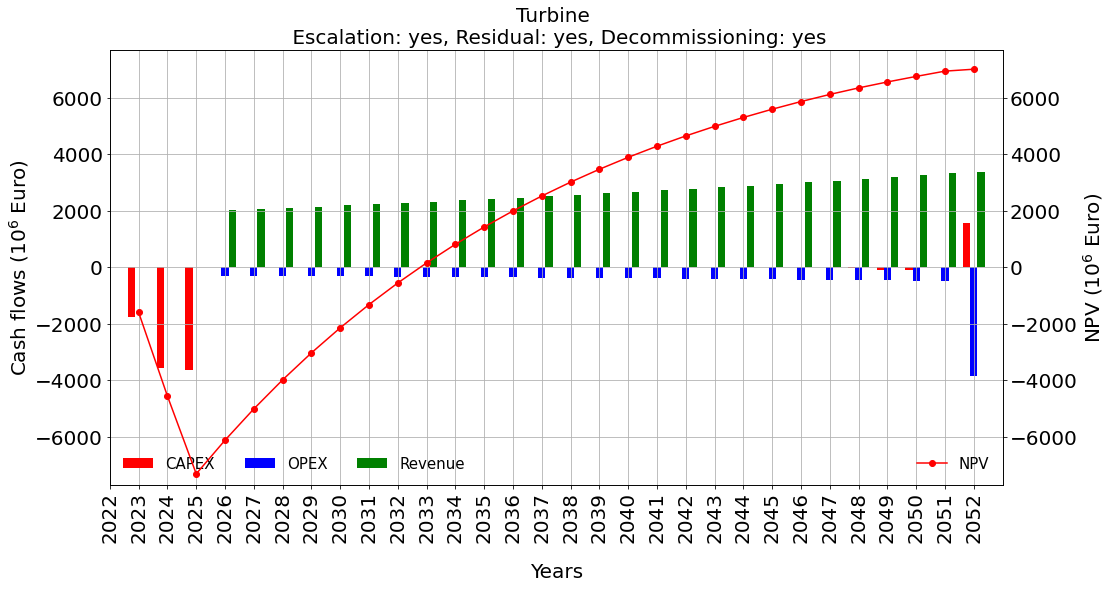

In [78]:
create_npv_plot(df_combined_npv, title='Turbine \n Escalation: yes, Residual: yes, Decommissioning: yes' )

##### 9 - Pie Plot

In [79]:
# collect the npv calculations per item (without revenues)
Turbine.df_npv = calculate_npv(Turbine.df, 2023, WACC=0.0984)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
ACStation.df_npv = calculate_npv(ACStation.df, 2023, WACC=0.0984)
DCCollectionCable.df_npv = calculate_npv(DCCollectionCable.df, 2023, WACC=0.0984)
DCACConverter.df_npv = calculate_npv(DCACConverter.df, 2023, WACC=0.0984)
Mainland.df_npv = calculate_npv(Mainland.df, 2023, WACC=0.0984)

In [80]:
# prepare input for pie plot
labels = ['Foundations & cables', 'Turbines', 'AC Station', 'DC collection cable', 'DCAC Converter', 'Mainland']
data = [
    -Foundation.df_npv.cashflow_sum.iloc[-1],
    -Turbine.df_npv.cashflow_sum.iloc[-1],
    -ACStation.df_npv.cashflow_sum.iloc[-1],
    -DCCollectionCable.df_npv.cashflow_sum.iloc[-1],
    -DCACConverter.df_npv.cashflow_sum.iloc[-1],
    -Mainland.df_npv.cashflow_sum.iloc[-1],
]   

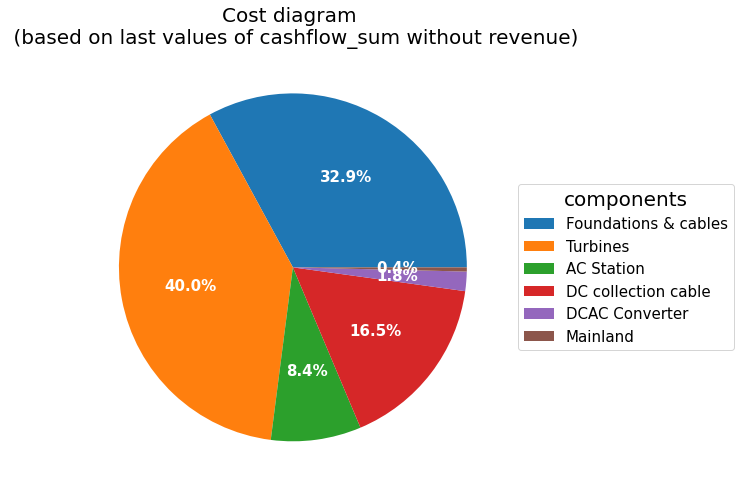

In [81]:
# create pie plot
fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="components",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
         fontsize=15)

plt.setp(autotexts, size=15, weight="bold")

ax.set_title("Cost diagram \n (based on last values of cashflow_sum without revenue)", fontsize=20)

plt.show()

##### 10 - LCOE

In [82]:
total_wind_energy_production_per_year = 3000 * 1000 * 4380 * 27  # parkcapacity * operational hours * operational lifecycle
print('total_wind_energy_production_per_year: {:.0f} kWh'.format(total_wind_energy_production_per_year))

energy_after_inter_array_cable_loss = 0.99 * total_wind_energy_production_per_year
print('energy_after_inter_array_cable_loss (20 km): {:.0f} kWh'.format(energy_after_inter_array_cable_loss))

energy_after_DC_collection_cable_loss = 0.98 * energy_after_inter_array_cable_loss
print('energy_after_DC_collection_cable_loss (20 km): {:.0f} kWh'.format(energy_after_DC_collection_cable_loss))

energy_after_DCAC_converter_loss = 0.98 * energy_after_DC_collection_cable_loss
print('energy_after_DCAC_converter_loss: {:.0f} kWh'.format(energy_after_DCAC_converter_loss))

total_wind_energy_production_per_year: 354780000000 kWh
energy_after_inter_array_cable_loss (20 km): 351232200000 kWh
energy_after_DC_collection_cable_loss (20 km): 344207556000 kWh
energy_after_DCAC_converter_loss: 337323404880 kWh


In [83]:
total_energy = energy_after_DCAC_converter_loss # kWh
total_cost = sum(data)            # EU

In [84]:
LCOE = total_cost / total_energy
print('LCOE: {:.2f} EU/kWh'.format(LCOE))

LCOE: 0.06 EU/kWh
